In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [5]:
inp0= pd.read_csv(r"C:\Users\Rohit Thanvi\Desktop\Uber Request Data.csv")

In [7]:
inp0.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [8]:
inp0["Request timestamp"]=  pd.to_datetime(inp0["Request timestamp"])
inp0["Drop timestamp"]=pd.to_datetime(inp0["Drop timestamp"])
inp0.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


In [9]:
inp0.dtypes

Request id                    int64
Pickup point                 object
Driver id                   float64
Status                       object
Request timestamp    datetime64[ns]
Drop timestamp       datetime64[ns]
dtype: object

In [10]:
inp0= inp0.drop(["Driver id"],axis=1)
inp0.head()

,Request id,Pickup point,Status,Request timestamp,Drop timestamp
0,619,Airport,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00
1,867,Airport,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00
2,1807,City,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00
3,2532,Airport,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00
4,3112,City,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


In [11]:
inp0.dtypes

Request id                    int64
Pickup point                 object
Status                       object
Request timestamp    datetime64[ns]
Drop timestamp       datetime64[ns]
dtype: object

In [12]:
inp0.duplicated().sum()

0

In [13]:
inp0["Pickup point"].unique()

array(['Airport', 'City'], dtype=object)

In [14]:
inp0.isnull().sum(axis=0)

Request id              0
Pickup point            0
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [15]:
inp0[(inp0["Drop timestamp"].isnull())].groupby("Status").size()

Status
Cancelled            1264
No Cars Available    2650
dtype: int64

In [16]:
inp0

,Request id,Pickup point,Status,Request timestamp,Drop timestamp
0,619,Airport,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00
1,867,Airport,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00
2,1807,City,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00
3,2532,Airport,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00
4,3112,City,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47
...,...,...,...,...,...
6740,6745,City,No Cars Available,2016-07-15 23:49:03,NaT
6741,6752,Airport,No Cars Available,2016-07-15 23:50:05,NaT
6742,6751,City,No Cars Available,2016-07-15 23:52:06,NaT
6743,6754,City,No Cars Available,2016-07-15 23:54:39,NaT


In [17]:
print(len(inp0["Pickup point"].unique()))
print(len(inp0["Request id"].unique()))
print(len(inp0["Status"].unique()))

2
6745
3


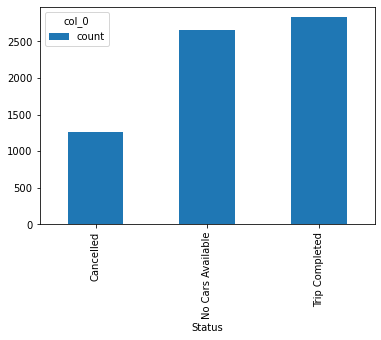

In [18]:
status=pd.crosstab(index =inp0["Status"],columns= "count")
status.plot.bar()
plt.show()

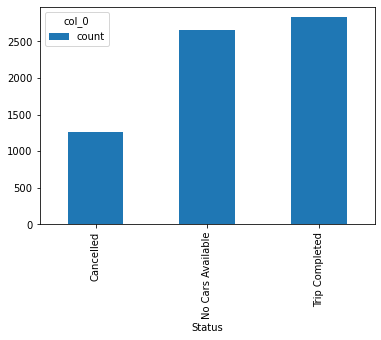

In [19]:
status1=pd.crosstab(index =inp0["Pickup point"],columns= "count")
status.plot.bar()
plt.show()


<AxesSubplot:ylabel='Status,Pickup point'>

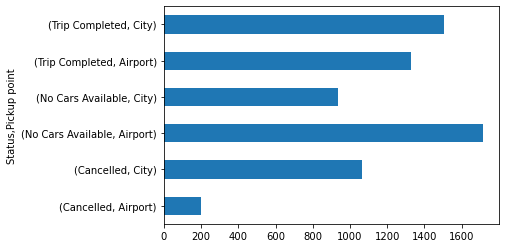

In [20]:
inp0.groupby(['Status', 'Pickup point']).size().plot.barh()

In [21]:
inp0["Request hour"]= inp0["Request timestamp"].dt.hour

In [22]:
inp0['Time Slot'] = 'EarlyMorning'

In [23]:
inp0.loc[inp0['Request hour'].between(5,8, inclusive=True),'Time Slot'] = 'morning'
inp0.loc[inp0['Request hour'].between(9,12, inclusive=True),'Time Slot'] = 'latemorning'
inp0.loc[inp0['Request hour'].between(13,16, inclusive=True),'Time Slot'] = 'noon'
inp0.loc[inp0['Request hour'].between(17,21, inclusive=True),'Time Slot'] = 'evening'
inp0.loc[inp0['Request hour'].between(21,24, inclusive=True),'Time Slot'] = 'night'

In [24]:
inp0["demand"]=1
inp0["supply"]=0

In [25]:
inp0.loc[(inp0['Status'] == 'Trip Completed'),'supply'] = 1

In [26]:
inp0["gap"]= inp0["demand"] - inp0["supply"]

In [27]:
inp0.loc[inp0['gap']==0,'gap'] = 'trip completed'
inp0.loc[inp0['gap']==1,'gap'] = 'trip not completed'

In [28]:
inp0= inp0.drop(["Request hour", "demand","supply"],axis=1)

<AxesSubplot:ylabel='gap'>

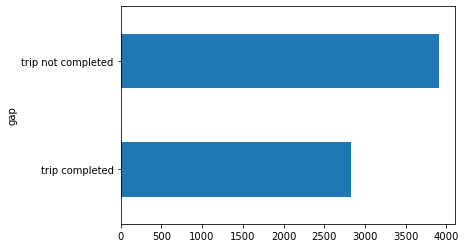

In [29]:
inp0.groupby("gap")["Time Slot"].size().plot.barh()

<AxesSubplot:xlabel='Time Slot', ylabel='count'>

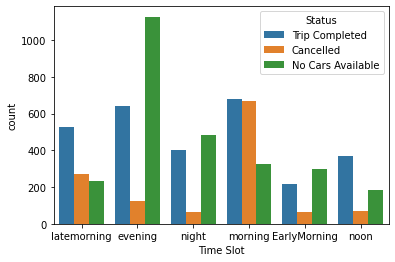

In [30]:
sns.countplot(data= inp0, x= inp0["Time Slot"], hue= inp0["Status"])

<AxesSubplot:xlabel='Time Slot', ylabel='count'>

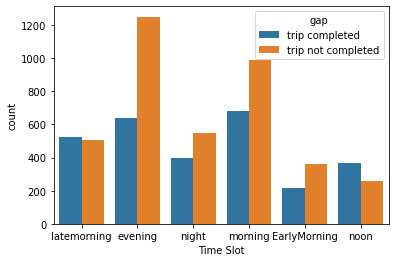

In [31]:
sns.countplot(data= inp0, x= inp0["Time Slot"], hue= inp0["gap"])

<AxesSubplot:xlabel='Pickup point', ylabel='count'>

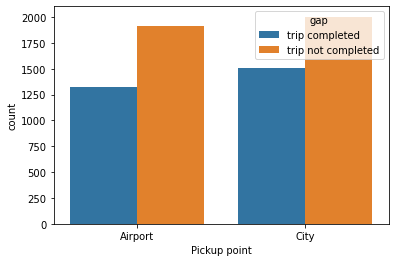

In [32]:
sns.countplot(data= inp0, x= inp0["Pickup point"], hue= inp0["gap"])

<AxesSubplot:xlabel='Pickup point,Time Slot,Status'>

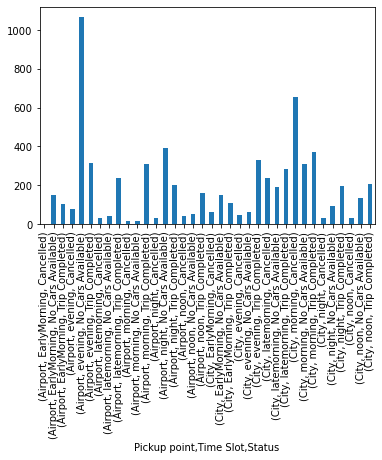

In [33]:
inp0.groupby(['Pickup point','Time Slot', 'Status'])['Request id'].count().plot.bar()

<AxesSubplot:xlabel='gap', ylabel='count'>

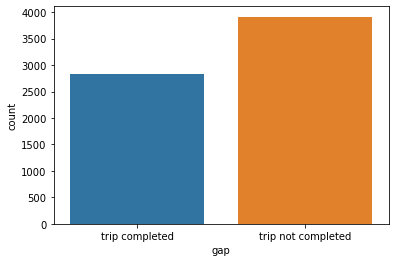

In [34]:
sns.countplot(data= inp0,x= inp0["gap"])

<AxesSubplot:xlabel='Time Slot'>

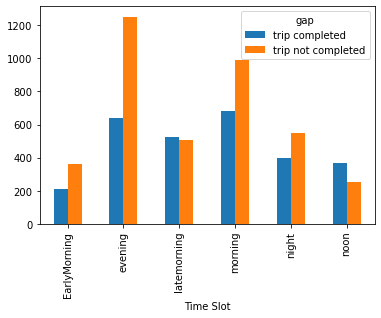

In [35]:
inp0.groupby(["Time Slot","gap"])["Request id"].count().unstack(fill_value=0).plot.bar()

<AxesSubplot:xlabel='Time Slot,Pickup point'>

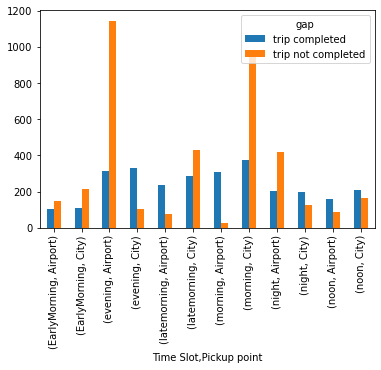

In [36]:
inp0.groupby(["Time Slot","Pickup point","gap"])["Request id"].count().unstack(fill_value=0).plot.bar()

# Observations:-
1.most cancelled rides are from city to airport then airport to city

2.There are more trips not completed then trips completed this will face loss in total revenue of the company

3.Status: "No car available"
  Where is it happening: Airport - i.e airport to city
  When is it happening: Evening 

  Status: "Cancelled"
  Where is it happening: City - i.e city to airport
  When is it happening: Morning


# Issue:-
1.In the morning hours, Though there is high demand for cabs from city to airport, the vice versa is not true.
Hence the driver tends to 'cancel' the request as getting a return trip from airport 
to city would be tough.

2.In the evening hours, Though there is high demand for cabs from airport to city, the vice versa is not true.
Hence 'no cars available' in the airport is the hightest in the evening.

# suggesstions:-
1.cabs during peak hours shoule be increased.

2.Company should be pay fixed waiting charge to driver.

3.Impose penalty for cancellation of requests by the drivers.

4.Promote continuous trip to airport with incentives.

# Conclusions:-
1.For solving the problem of demand and supply gap from airport to city, making a permanent stand in the airport itself where the cabs will be available at all times and the incomplete requests can come down significantly.

2.Uber can provide some incentives to the driver who complete the trip from city to airport in the morning part. This might result the driver to not cancel the request from city to airport trips.

3.company should increase the numbers of cab in its fleet.